<a href="https://colab.research.google.com/github/yopiazani02/pneumoniaVsCovid19/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os

In [3]:
path = "/content/drive/My Drive/Pneumonia_and_COVID19/TRAIN"

In [7]:
files = os.listdir(path)

In [11]:
files

['COVID-19', 'PNEUMONIA (VIRUS)']

In [10]:
categories = []

In [15]:
train_covid_dir = os.path.join('/content/drive/My Drive/Pneumonia_and_COVID19/TRAIN/COVID-19')
train_pneumonia_dir = os.path.join('/content/drive/My Drive/Pneumonia_and_COVID19/TRAIN/PNEUMONIA (VIRUS)')

val_covid_dir = os.path.join('/content/drive/My Drive/Pneumonia_and_COVID19/TEST/COVID-19')
val_pneumonia_dir = os.path.join('/content/drive/My Drive/Pneumonia_and_COVID19/TEST/PNEUMONIA (VIRUS)')


In [17]:
train_covid_names = os.listdir(train_covid_dir)
train_pneumonia_names = os.listdir(train_pneumonia_dir)

validation_covid_names = os.listdir(val_covid_dir)
validation_pneumonia_names = os.listdir(val_pneumonia_dir)

In [18]:
import tensorflow as tf

In [20]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Pneumonia_and_COVID19/TRAIN',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '//content/drive/My Drive/Pneumonia_and_COVID19/TEST',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1404 images belonging to 2 classes.
Found 159 images belonging to 2 classes.


In [26]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/5
8/8 [==============================] - 575s 72s/step - loss: 0.4264 - accuracy: 0.8441 - val_loss: 0.3820 - val_accuracy: 0.9308
Epoch 2/5
8/8 [==============================] - 113s 14s/step - loss: 0.1927 - accuracy: 0.9578 - val_loss: 0.3174 - val_accuracy: 0.9308
Epoch 3/5
8/8 [==============================] - 36s 5s/step - loss: 0.1273 - accuracy: 0.9590 - val_loss: 0.0797 - val_accuracy: 0.9497
Epoch 4/5
8/8 [==============================] - 28s 3s/step - loss: 0.0768 - accuracy: 0.9696 - val_loss: 0.0459 - val_accuracy: 0.9874
Epoch 5/5
8/8 [==============================] - 27s 3s/step - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.0395 - val_accuracy: 0.9874


In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a pneumonia")
  else:
    print(fn + " is a covid")

Saving person1_virus_11.jpeg to person1_virus_11.jpeg
[1.]
person1_virus_11.jpeg is a pneumonia


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


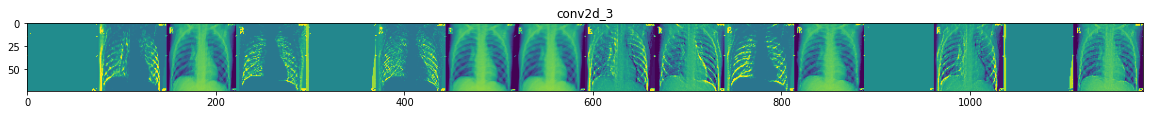

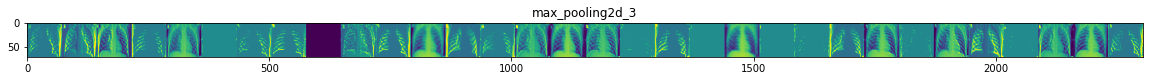

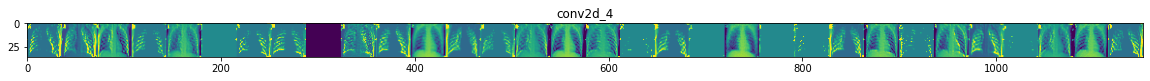

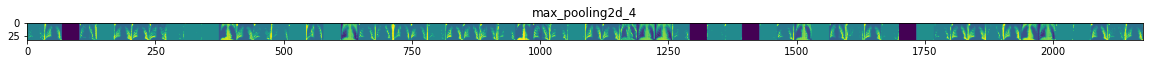

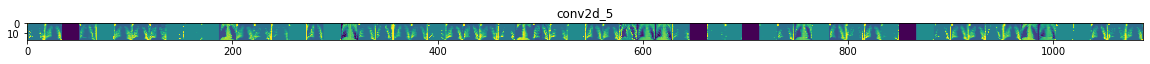

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
covid_img_files = [os.path.join(train_covid_dir, f) for f in train_covid_names]
pneumonia_img_files = [os.path.join(train_pneumonia_dir, f) for f in train_pneumonia_names]
img_path = random.choice(covid_img_files + pneumonia_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')